# Local excitation/lateral inhibition linear rate model

### The following code will provide an example of the effect of various input patterns have on the outputs of a recurrant network with local excitation/lateral inhibition connectivity.

### Imports

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from matplotlib import cm
import skimage

sys.path.append('/home/naxos2-raid1/haleigh/Code/Python Scripts/HM/linearMHModel')
from linearLELI import runModel
from autocorr_wavelength import eventAutocorrFitWavelength

### Model parameters

In [2]:
#parameters
networkSize=(60,60)  #(N,M) in pixels
n_patterns=5         # number of stimuli
nevents=40           # trials per stimulus pattern
h=0.4                  # heterogenity (range 0-1)
perc_amp=0.2         #strength of structured component of input
seed=1              # random noise seed

sigmamax=1.8
inhib_factor=2
network_resolution=runModel.calcSpatialScale(sigmax=sigmamax,inh_factor=inhib_factor) 

## Run model -- uniform input

In [3]:
#Run model
evts,inputs=runModel.runModel(networkSize=networkSize,nevents=nevents,index=seed,structured_input=None,strength_deformation=h)
spontaneous_evts=evts

Text(0, 0.5, 'Outputs')

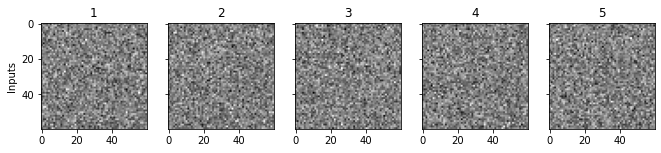

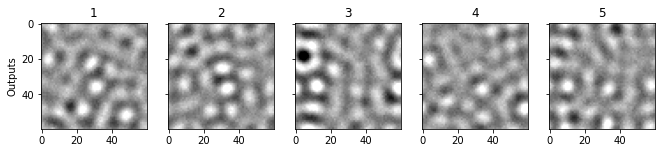

In [4]:
#Plot inputs
ncols=5
nrows=1
fh,axs=plt.subplots(nrows,ncols,figsize=(11,11),sharex=True,sharey=True) # make an array of subplot axes
for i,(ax,evt) in enumerate(zip(axs.flatten(),inputs)):
    im=ax.imshow(evt,cmap=cm.gray,vmin=0,vmax=2)
    ax.set_title(i+1)
axs[0].set_ylabel('Inputs')

fh,axs=plt.subplots(nrows,ncols,figsize=(11,11),sharex=True,sharey=True) # make an array of subplot axes
for i,(ax,evt) in enumerate(zip(axs.flatten(),evts)):
    im=ax.imshow(evt,cmap=cm.gray,vmin=-5,vmax=5)
    ax.set_title(i+1)
axs[0].set_ylabel('Outputs')

## Run model -- spatially structured inputs

### Generate spatially structured inputs (same spatial frequency)

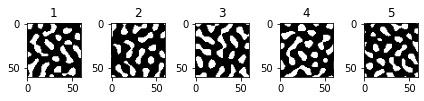

In [5]:
#bandpass cutoffs (pixels)
low=4
high=6

input_patterns=runModel.generateRandomBandpassPatterns(low,high,imgSize=networkSize,npatterns=n_patterns,seed=81622)

#binarize (optional)
input_patterns=np.array(input_patterns>np.percentile(input_patterns,68),dtype='float') 

#show patterns
fig,axes=plt.subplots(1,5)
for ipattern, pattern in enumerate(input_patterns):
    axes[ipattern].imshow(pattern,cmap=cm.gray)
    axes[ipattern].set_title(str(ipattern+1))
plt.tight_layout()

In [6]:
# Run model
# Can take a few minutes, depending on the number of events

stim_events=[]
for structured_input in input_patterns:
    
    #normalize to maximum 1, minimum 0
    min1=np.min(structured_input)
    max1=np.max(structured_input)
    structured_input=(structured_input-min1)/(max1-min1)

    evts,inputs=runModel.runModel(networkSize=networkSize,nevents=nevents,index=seed,structured_input=structured_input,structured_amp=perc_amp,strength_deformation=h)
    stim_events.append(evts)

Adding structured input
Adding structured input
Adding structured input
Adding structured input
Adding structured input


Text(0.5, 1.0, 'Mean')

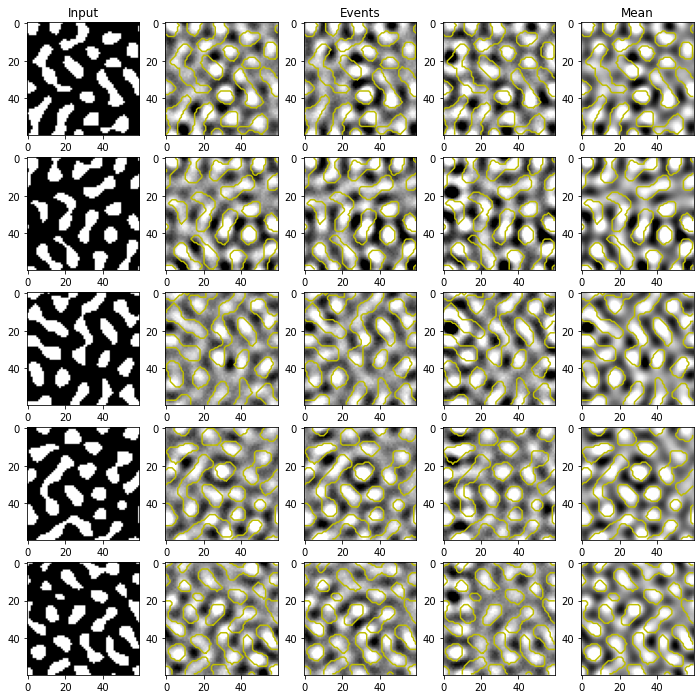

In [7]:
#Plot patterns
n_examples=3
show_contours=True
fig,axes=plt.subplots(n_patterns,n_examples+2,figsize=(12,12))


for ipattern, pattern in enumerate(input_patterns):
    #plot input pattern
    axes[ipattern,0].imshow(pattern,cmap=cm.gray)
    conC=skimage.measure.find_contours(pattern,0.05) #contour of stimulus input pattern
    
    evts=stim_events[ipattern]
    
    #plot individual trial examples
    for ievt in range(n_examples):
        axes[ipattern,ievt+1].imshow(evts[ievt],cmap=cm.gray,vmin=-5,vmax=5)
        if show_contours:
            for c in conC:
                axes[ipattern,ievt+1].plot(c[:,1],c[:,0],color='y',lw=1.5,alpha=1) 
    
    #plot mean response
    axes[ipattern,n_examples+1].imshow(np.nanmean(evts,axis=0),cmap=cm.gray,vmin=-4,vmax=4)
    if show_contours:
            for c in conC:
                axes[ipattern,n_examples+1].plot(c[:,1],c[:,0],color='y',lw=1.5,alpha=1) 

axes[0,0].set_title('Input')
axes[0,2].set_title('Events')
axes[0,4].set_title('Mean')


### Generate spatially structured inputs -- varying spatial frequency

(10, 60, 60)


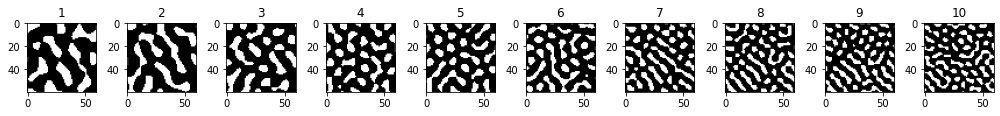

In [8]:
#bandpass cutoffs (pixels)
spat_freqs=[3,3.5,4,4.5,5,5.5,6,6.5,7,7.5]
bw_step=2   #bandwidth step size
n_patterns2=1

inputs=[]
for spat_freq in spat_freqs:
    input_patterns=runModel.generateRandomBandpassPatterns(spat_freq,spat_freq+bw_step,imgSize=networkSize,npatterns=n_patterns2,seed=81622)

    #binarize (optional)
    input_patterns=np.array(input_patterns>np.percentile(input_patterns,68),dtype='float') 
    inputs.append(np.array(input_patterns))

input_patterns=np.squeeze(np.array(inputs))
print(input_patterns.shape)

#show patterns
fig,axes=plt.subplots(1,len(spat_freqs),figsize=(14,2))
for ipattern, pattern in enumerate(input_patterns):
    axes[ipattern].imshow(pattern,cmap=cm.gray)
    axes[ipattern].set_title(str(ipattern+1))
plt.tight_layout()

In [9]:
# Run model
stim_events=[]
for structured_input in input_patterns:
    
    #normalize to maximum 1, minimum 0
    min1=np.min(structured_input)
    max1=np.max(structured_input)
    structured_input=(structured_input-min1)/(max1-min1)

    evts,inputs=runModel.runModel(networkSize=networkSize,nevents=nevents,index=seed,structured_input=structured_input,structured_amp=perc_amp,strength_deformation=h)
    
    stim_events.append(evts)

Adding structured input
Adding structured input
Adding structured input
Adding structured input
Adding structured input
Adding structured input
Adding structured input
Adding structured input
Adding structured input
Adding structured input


Text(0.5, 1.0, 'Mean')

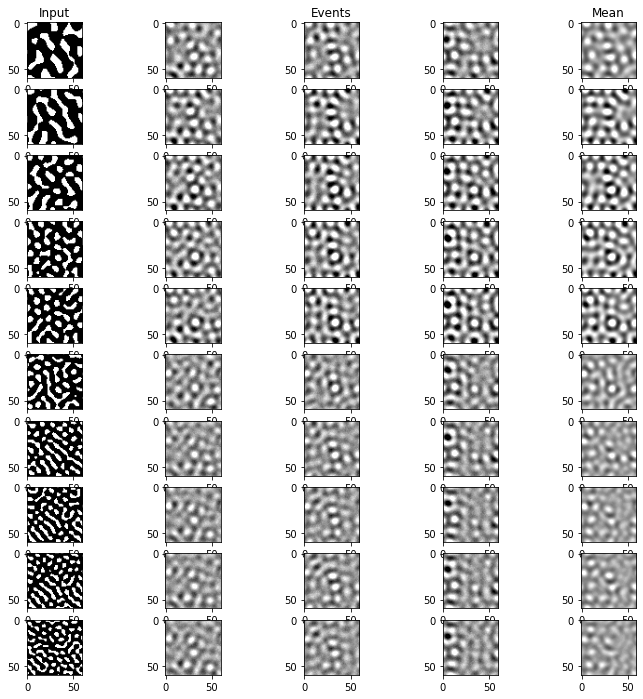

In [10]:
#Plot patterns
n_examples=3
show_contours=False
fig,axes=plt.subplots(input_patterns.shape[0],n_examples+2,figsize=(12,12))


for ipattern, pattern in enumerate(input_patterns):
    #plot input pattern
    axes[ipattern,0].imshow(pattern,cmap=cm.gray)
    conC=skimage.measure.find_contours(pattern,0.05) #contour of stimulus input pattern
    
    evts=stim_events[ipattern]
    
    #plot individual trial examples
    for ievt in range(n_examples):
        axes[ipattern,ievt+1].imshow(evts[ievt],cmap=cm.gray,vmin=-5,vmax=5)
        if show_contours:
            for c in conC:
                axes[ipattern,ievt+1].plot(c[:,1],c[:,0],color='y',lw=1.5,alpha=1) 
    
    #plot mean response
    axes[ipattern,n_examples+1].imshow(np.nanmean(evts,axis=0),cmap=cm.gray,vmin=-4,vmax=4)
    if show_contours:
            for c in conC:
                axes[ipattern,n_examples+1].plot(c[:,1],c[:,0],color='y',lw=1.5,alpha=1) 

axes[0,0].set_title('Input')
axes[0,2].set_title('Events')
axes[0,4].set_title('Mean')

## Estimate wavelength

Calculating autocorrelation
Fitting wavelength


/home/naxos2-raid1/haleigh/.conda/envs/python3/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[1.05085248 0.79873803 0.54368284 0.30330539 0.00352683 0.29513195
 0.54960193 0.79832281 1.05055646]
Lambda: 0.5896410098883631


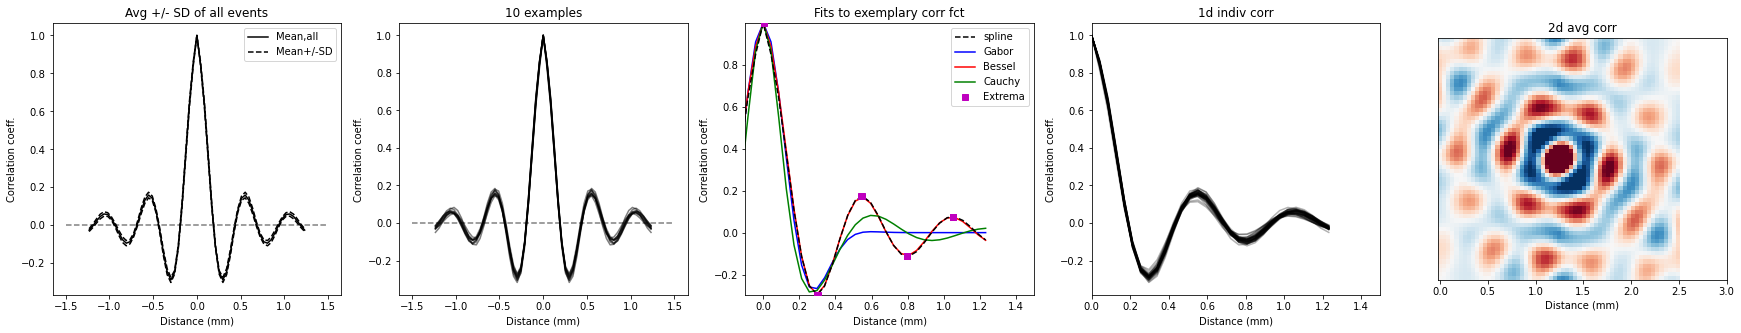

In [11]:
#parameters
roi=np.ones(networkSize)
useFirstPeak=False #Method of calculating wavelength -- if True, will use the distance to first Peak. 
                                                       #If False, will find distance to first trough and double it.
normToLambda=True #Normalize values to the distance of one wavelength of the endogneous network

if normToLambda:
    #calculate wavelength of spontaneous events
    autocorr,spectrum,distance,_,_,_,area_peak_locs,area_peak_vals=eventAutocorrFitWavelength(spontaneous_evts,
                                                                                              roi,ump=network_resolution/2,
                                                                                              makeFig=True,saveFig=None)
    if useFirstPeak:
        lambdaSpont=np.nanmean(area_peak_locs[:,1])
    else:
        lambdaSpont=np.nanmean(area_peak_locs[:,0]*2)

    print('Lambda: {}'.format(lambdaSpont))


Calculating autocorrelation
Fitting wavelength
[1.14146089e+00 1.03806815e+00 9.11411885e-01 7.72893906e-01
 6.27109884e-01 4.80130009e-01 3.31976569e-01 1.80693834e-01
 1.82974922e-04 1.81441289e-01]


/home/naxos2-raid1/haleigh/.conda/envs/python3/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/naxos2-raid1/haleigh/.conda/envs/python3/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:728: RuntimeWarning: The number of zeros exceeds mest
  warnings.warn(RuntimeWarning("The number of zeros exceeds mest"))



 Input pattern wavelengths:
[1.33506005 1.20665254 1.04294345 0.90680374 0.8672053  0.80732442
 0.71678863 0.67314382 0.65661415 0.61416204]


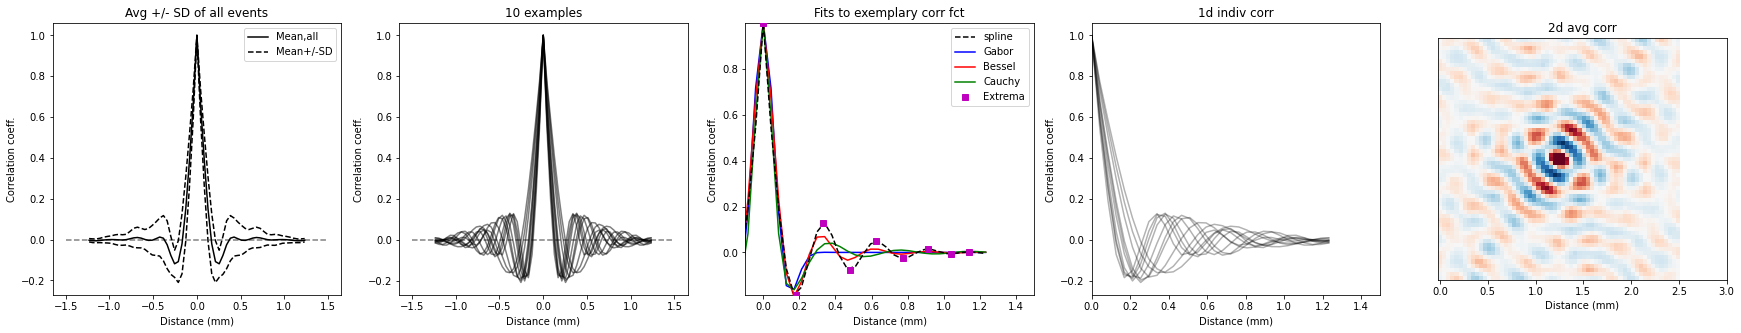

In [12]:
#wavelength of input patterns
autocorr,spectrum,distance,_,_,_,area_peak_locs,area_peak_vals=eventAutocorrFitWavelength(input_patterns,
                                                                                          roi,ump=network_resolution/2,
                                                                                          makeFig=True,saveFig=None)
if useFirstPeak:
    input_wavelengths=area_peak_locs[:,1]
else:
    input_wavelengths=area_peak_locs[:,0]*2

if normToLambda:
    input_wavelengths=input_wavelengths/lambdaSpont
print('\n Input pattern wavelengths:')
print(input_wavelengths)

Calculating autocorrelation
Fitting wavelength
[1.0544593  0.80306806 0.54147413 0.29522051 0.00901478 0.29819063
 0.55039521 0.7988504  1.05355025]


/home/naxos2-raid1/haleigh/.conda/envs/python3/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',



 Mean response wavelengths:
[1.07366849 1.02745286 1.01720514 0.97413858 0.98175186 0.94671397
 0.96292144 0.96448039 0.97994013 1.00639394]


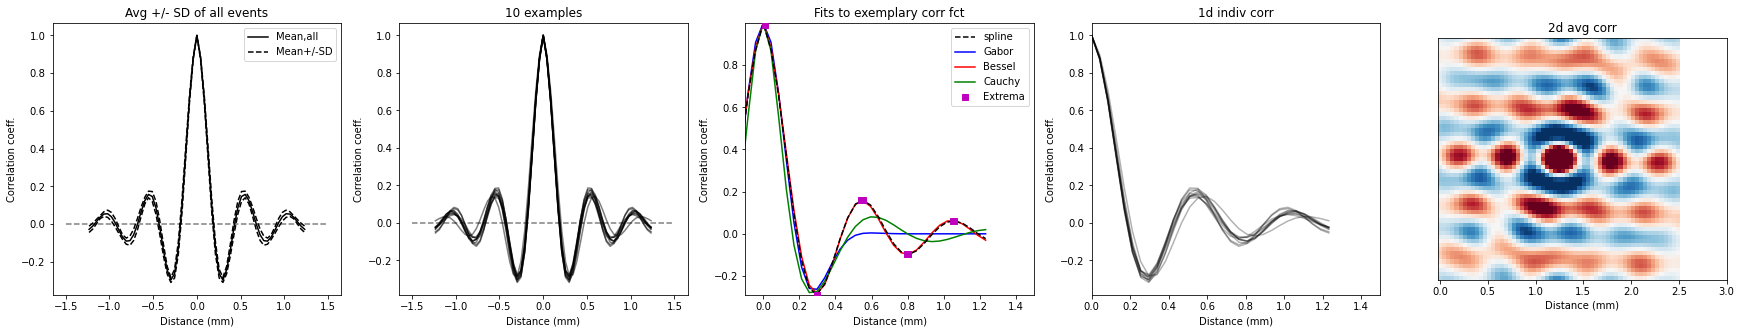

In [13]:
#wavelength of mean response
mean_responses=np.mean(np.array(stim_events),axis=1)
autocorr,spectrum,distance,_,_,_,area_peak_locs,area_peak_vals=eventAutocorrFitWavelength(mean_responses,
                                                                                          roi,ump=network_resolution/2,
                                                                                          makeFig=True,saveFig=None)
if useFirstPeak:
    mean_resp_wavelengths=area_peak_locs[:,1]
else:
    mean_resp_wavelengths=area_peak_locs[:,0]*2

if normToLambda:
    mean_resp_wavelengths=mean_resp_wavelengths/lambdaSpont
print('\n Mean response wavelengths:')
print(mean_resp_wavelengths)

In [14]:
#wavelength of individual events
mn_evt_wavelengths=[]
for evts in stim_events:
    autocorr,spectrum,distance,_,_,_,area_peak_locs,area_peak_vals=eventAutocorrFitWavelength(evts,
                                                                                              roi,ump=network_resolution/2,
                                                                                              makeFig=False,saveFig=None)
    if useFirstPeak:
        evt_wavelengths=area_peak_locs[:,1]
    else:
        evt_wavelengths=area_peak_locs[:,0]*2

    if normToLambda:
        evt_wavelengths=evt_wavelengths/lambdaSpont
        
    print('\n Average event wavelengths:')
    print(np.nanmean(evt_wavelengths))
    mn_evt_wavelengths.append(np.nanmean(evt_wavelengths))

Calculating autocorrelation
Fitting wavelength


/home/naxos2-raid1/haleigh/.conda/envs/python3/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[1.07715371e+00 8.17755133e-01 5.54264980e-01 3.05420653e-01
 6.03359969e-05 3.02598797e-01 5.63193690e-01 8.13727180e-01
 1.05981352e+00]

 Average event wavelengths:
1.0437388706138855
Calculating autocorrelation
Fitting wavelength
[1.04370809 0.79806642 0.54401065 0.30307368 0.00199058 0.29481156
 0.5505859  0.79800416 1.0456787 ]

 Average event wavelengths:
1.0182641169308053
Calculating autocorrelation
Fitting wavelength
[1.03496675e+00 7.95960804e-01 5.42268456e-01 3.02530024e-01
 3.44781729e-04 2.89385656e-01 5.45863673e-01 7.90997810e-01
 1.03943392e+00]

 Average event wavelengths:
1.0142542046528429
Calculating autocorrelation
Fitting wavelength
[1.01807885 0.78434763 0.53709209 0.29354184 0.00222271 0.28735435
 0.53898912 0.77379147 1.0199553 ]

 Average event wavelengths:
0.9849610325953557
Calculating autocorrelation
Fitting wavelength


/home/naxos2-raid1/haleigh/.conda/envs/python3/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:728: RuntimeWarning: The number of zeros exceeds mest
  warnings.warn(RuntimeWarning("The number of zeros exceeds mest"))


[1.01148066 0.78092748 0.52663263 0.2780467  0.00123725 0.28333224
 0.53628788 0.76706458 1.01081387]

 Average event wavelengths:
0.9785485294796213
Calculating autocorrelation
Fitting wavelength
[1.03004413 0.77943657 0.54028223 0.29376561 0.00123874 0.29279767
 0.54665392 0.77590932 1.03360235]

 Average event wavelengths:
0.9742651579366903
Calculating autocorrelation
Fitting wavelength
[1.04391395 0.79535072 0.53947734 0.28924645 0.0225186  0.28456968
 0.5479331  0.79268606 1.04485573]

 Average event wavelengths:
0.973147375624442
Calculating autocorrelation
Fitting wavelength
[1.04957273 0.7958508  0.54095678 0.29715052 0.00374079 0.29663017
 0.54985512 0.79581557 1.0478258 ]

 Average event wavelengths:
0.9853111781043273
Calculating autocorrelation
Fitting wavelength
[1.0518242  0.79561777 0.5397121  0.29820216 0.00358334 0.29507167
 0.5491039  0.79906211 1.04870796]

 Average event wavelengths:
0.9949580372509328
Calculating autocorrelation
Fitting wavelength
[1.054374   0.79

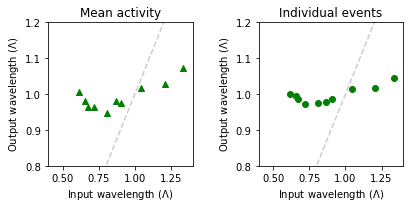

In [27]:
fig,axes=plt.subplots(1,2,figsize=(6,3))

axes[0].scatter(input_wavelengths,mean_resp_wavelengths,color='g',marker='^')
axes[0].plot([0,2],[0,2],'k--',alpha=0.2)
axes[0].set_xlim(0.4,1.4)
axes[0].set_ylim(0.8,1.2)
axes[0].set_xlabel(r'Input wavelength ($\Lambda$)')
axes[0].set_ylabel(r'Output wavelength ($\Lambda$)')
axes[0].set_title('Mean activity')

axes[1].scatter(input_wavelengths,mn_evt_wavelengths,color='g',marker='o')
axes[1].plot([0,2],[0,2],'k--',alpha=0.2)
axes[1].set_xlim(0.4,1.4)
axes[1].set_ylim(0.8,1.2)
axes[1].set_xlabel(r'Input wavelength ($\Lambda$)')
axes[1].set_ylabel(r'Output wavelength ($\Lambda$)')
axes[1].set_title('Individual events')
plt.tight_layout()